In [1]:
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
M = nx.read_gml("polblogs.gml")


1. Create a nice looking graph of the political blog network

In [5]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

C:\Users\Alemayehu\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


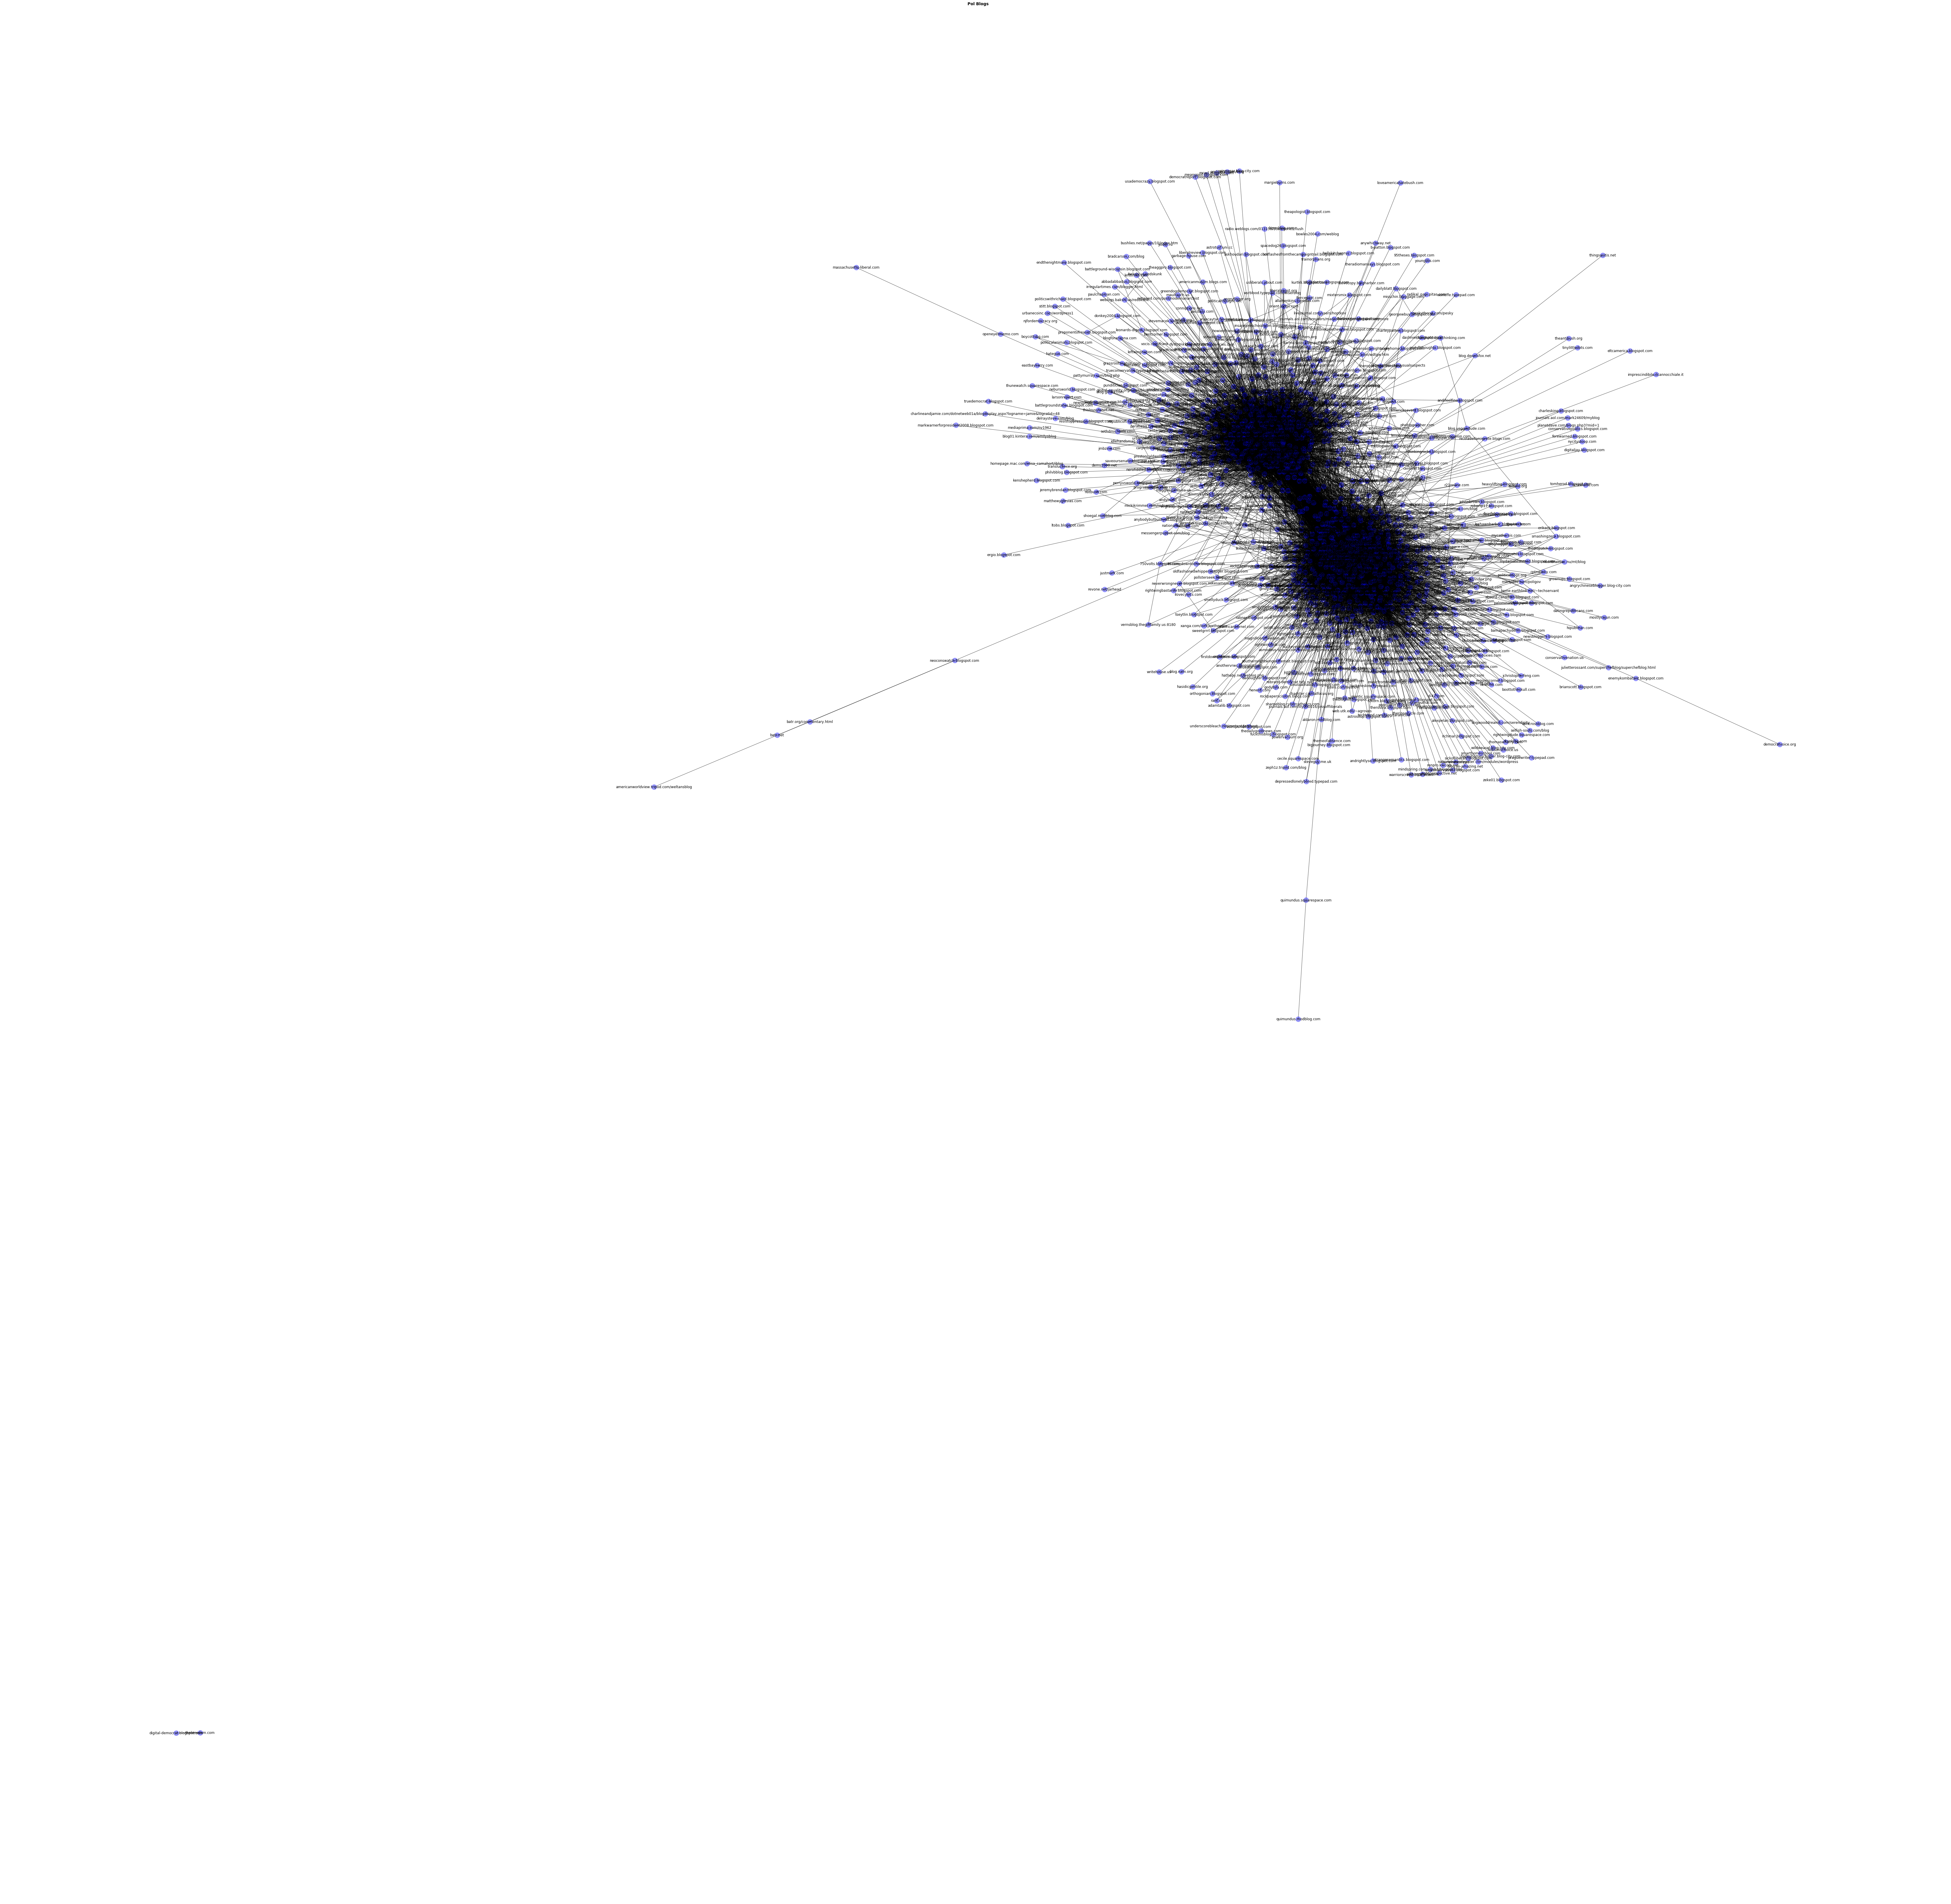

In [6]:
plt.figure(figsize=(120,120))
pos=nx.spring_layout(G, iterations=500, scale=10, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Pol Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.75,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

Q. What are the 10 most influential blogs?

Measure the importance of blogs using eigen vector centrality. It gives us a dictionary of each node and its centrality number, how central is that node to the network.

In [7]:
centrality=nx.eigenvector_centrality(G)

We can't sort a disctionary .Take the disctionary and coarse it into a list of tuples. Sort the list of tuples by the centrality measure. We will get a list of the most important blogs first.

In [8]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

The most important blogs at the top of the list

In [9]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718312),
 (u'bodyandsoul.typepad.com', 0.1411348917433036),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790953),
 (u'dneiwert.blogspot.com', 0.1223756469254602),
 (u'pandagon.net', 0.12183624597295237),
 (u'billmon.org', 0.11749519874171405),
 (u'xnerg.blogspot.com', 0.11480053426058826),
 (u'madkane.com/notable.html', 0.11418196235451711),
 (u'elayneriggs.blogspot.com', 0.1126455958238381),
 (u'busybusybusy.com', 0.11024429093889697),
 (u'michaelberube.com', 0.1060817618322359),
 (u'pacificviews.org', 0.10577419182137969),
 (u'nielsenhayden.com/electrolite', 0.10552543344289474),
 (u'instapundit.com', 0.10542786230862622),
 (u'prospect.org/weblog', 0.10434083652109472),
 (

Answer: The 10 most important blog posts are: 
  atrios.blogspot.com, 
  dailykos.com, 
  washingtonmonthly.com, 
  digbysblog.blogspot.com, 
  bodyandsoul.typepad.com, 
  liberaloasis.com, 
  tbogg.blogspot.com, 
  corrente.blogspot.com, 
  talkingpointsmemo.com, 
  dneiwert.blogspot.com
 


 Q. What are the 10 least influential blogs?

In [10]:
#The least important blogs are at the top of the following list(reverse = False)
sorted(blog_list, key=lambda x: x[1], reverse=False)

[(u'thelonedem.com', 1.7763251097559663e-72),
 (u'digital-democrat.blogspot.com', 1.7763251097559663e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.79632559492946e-07),
 (u'democratvoice.org', 1.02333882041133e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658611e-05),
 (u'loveamericahatebush.com', 2.0342028615381707e-05),
 (u'imprescindibile.ilcannocchiale.it', 2.3892545677495574e-05),
 (u'eltcamerica.blogspot.com', 2.8364859022789436e-05),
 (u'usademocrazy.blogspot.com', 2.9844388295431837e-05),
 (u'depressedlonelybored.typepad.com', 3.040150199384599e-05),
 (u'margieburns.com', 3.319916123051677e-05),
 (u'endthenightmare.blogspot.com', 3.588339764041677e-05),
 (u'democratreport.blogspot.com', 3.6215007017388404e-05),
 (u'meansp

Answer: The 10 least influential blogs are: 
   thelonedem.com, 
   digital-democrat.blogspot.com, 
   americanworldview.tripod.com/weltansblog, 
   quimundus.modblog.com,
   batr.org/commentary.html, 
   batr.net, 
   democratvoice.org, 
   quimundus.squarespace.com, 
   massachusetts-liberal.com, 
   thingsasitis.net
 